## Import packages

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## read the data

In [45]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
df_train.shape

(1460, 81)

In [47]:
df_train.duplicated().sum()

0

In [48]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [49]:
df_test.shape

(1459, 80)

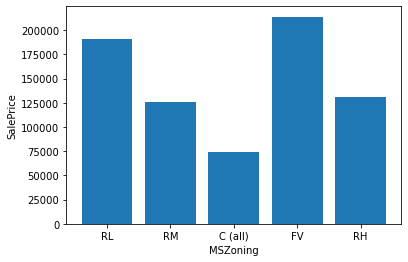

In [50]:
plt.hist(df_train['MSZoning'])
MSZoning = df_train.groupby(['MSZoning'],as_index=False).mean()
plt.bar(MSZoning['MSZoning'], MSZoning['SalePrice'])
plt.xlabel("MSZoning")
plt.ylabel("SalePrice")
plt.show()
plt.show()

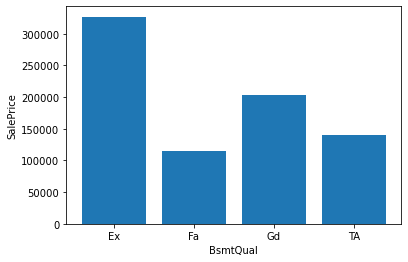

In [51]:
bsmtqual = df_train.groupby(['BsmtQual'],as_index=False).mean()
plt.bar(bsmtqual['BsmtQual'], bsmtqual['SalePrice'])
plt.xlabel("BsmtQual")
plt.ylabel("SalePrice")
plt.show()

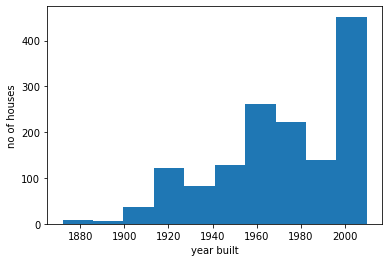

In [52]:
plt.hist(df_train['YearBuilt'])
plt.xlabel("year built")
plt.ylabel("no of houses")
plt.show()

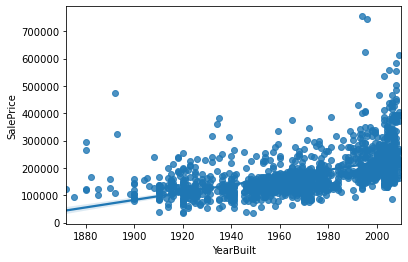

In [53]:
sns.regplot(x='YearBuilt',y='SalePrice',data=df_train)
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

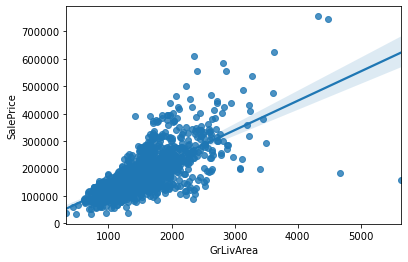

In [54]:
sns.regplot(x='GrLivArea',y='SalePrice',data=df_train)

In [55]:
df = pd.concat([df_train,df_test],axis=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [56]:
df.shape

(2919, 81)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## clean data

In [58]:
t=df.isnull().sum()
t.head(60)
t.tail(60)

RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive          0
WoodDeckSF

In [59]:
corr1=df.corr()['SalePrice'].sort_values(ascending=False)
corr1

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [60]:
def drop(x):
    d = df.drop([x],axis=1,inplace=True)
    return df

In [61]:
drop('Alley')
drop('PoolQC')
drop('Fence')
drop('MiscFeature')
drop('GarageYrBlt')
drop('FireplaceQu')
drop('MiscVal')
drop('MoSold')
drop('YrSold')
drop('BsmtFinSF2')
drop('BsmtHalfBath')
drop('LowQualFinSF')
drop('OverallCond')
drop('MSSubClass')
drop('EnclosedPorch')
drop('KitchenAbvGr')

,Id,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,1,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,0,0,WD,Normal,208500.0
1,2,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,0,0,WD,Normal,181500.0
2,3,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,0,0,WD,Normal,223500.0
3,4,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,0,0,0,WD,Abnorml,140000.0
4,5,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,0,0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,Y,0,0,0,0,0,WD,Normal,NaN
1455,2916,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,24,0,0,0,WD,Abnorml,NaN
1456,2917,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,474,0,0,0,0,WD,Abnorml,NaN
1457,2918,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,Y,80,32,0,0,0,WD,Normal,NaN


In [62]:
def fill(y,x):
    if x =='mean':
        df[y] = df[y].fillna(df[y].mean())
    elif x == 'mode':
        df[y] = df[y].fillna(df[y].mode()[0])
    return 'done'

In [63]:
fill('LotFrontage','mean')
fill('MasVnrArea','mean')
fill('BsmtFinSF1','mean')
fill('BsmtUnfSF','mean')
fill('TotalBsmtSF','mean')
fill('BsmtFullBath','mean')
fill('GarageArea','mean')
fill('GarageCars','mean')
fill('BsmtCond','mode')
fill('GarageQual','mode')
fill('GarageCond','mode')
fill('GarageType','mode')
fill('GarageFinish','mode')
fill('MasVnrType','mode')
fill('BsmtExposure','mode')
fill('BsmtExposure','mode')
fill('BsmtFinType1','mode')
fill('BsmtFinType2','mode')
fill('Electrical','mode')
fill('MSZoning','mode')
fill('Utilities','mode')
fill('Exterior1st','mode')
fill('Exterior2nd','mode')
fill('BsmtQual','mode')
fill('KitchenQual','mode')
fill('Functional','mode')
fill('SaleType','mode')

'done'

## Analysis the data

In [64]:
df.describe()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,69.305795,10168.114080,6.089072,1971.312778,1984.264474,102.201312,441.423235,560.772104,1051.777587,...,6.451524,0.597122,1.766621,472.874572,93.709832,47.486811,2.602261,16.062350,2.251799,180921.195890
std,842.787043,21.312345,7886.996359,1.409947,30.291442,20.894344,178.626089,455.532750,439.468337,440.690726,...,1.569379,0.646129,0.761494,215.357904,126.526589,67.575493,25.188169,56.184365,35.663946,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,730.500000,60.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,...,5.000000,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,1460.000000,69.305795,9453.000000,6.000000,1973.000000,1993.000000,0.000000,369.000000,467.000000,990.000000,...,6.000000,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,163000.000000
75%,2189.500000,78.000000,11570.000000,7.000000,2001.000000,2004.000000,163.500000,733.000000,805.000000,1302.000000,...,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,214000.000000
max,2919.000000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,...,15.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,508.000000,576.000000,800.000000,755000.000000


In [65]:
corr=df.corr()['SalePrice'].sort_values(ascending=False)
corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475210
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334820
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
3SsnPorch       0.044584
Id             -0.021917
Name: SalePrice, dtype: float64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

In [67]:
object_col = ['MSZoning','LotShape', 'LandContour', 'Utilities',
              'LotConfig','LandSlope', 'Neighborhood', 'Condition1',
              'Condition2', 'BldgType','HouseStyle','RoofStyle', 
              'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
              'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
              'Heating','HeatingQC', 'CentralAir', 'Electrical',
              'KitchenQual','Functional', 'GarageType', 
              'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive',
              'SaleType', 'SaleCondition','Street']

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in object_col:
    transf = le.fit_transform(df[x])
    df[x] = transf

In [69]:
df

,Id,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,1,3,65.0,8450,1,3,3,0,4,0,...,4,2,0,61,0,0,0,8,4,208500.0
1,2,3,80.0,9600,1,3,3,0,2,0,...,4,2,298,0,0,0,0,8,4,181500.0
2,3,3,68.0,11250,1,0,3,0,4,0,...,4,2,0,42,0,0,0,8,4,223500.0
3,4,3,60.0,9550,1,0,3,0,0,0,...,4,2,0,35,0,0,0,8,0,140000.0
4,5,3,84.0,14260,1,0,3,0,2,0,...,4,2,192,84,0,0,0,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,21.0,1936,1,3,3,0,4,0,...,4,2,0,0,0,0,0,8,4,NaN
1455,2916,4,21.0,1894,1,3,3,0,4,0,...,4,2,0,24,0,0,0,8,0,NaN
1456,2917,3,160.0,20000,1,3,3,0,4,0,...,4,2,474,0,0,0,0,8,0,NaN
1457,2918,3,62.0,10441,1,3,3,0,4,0,...,4,2,80,32,0,0,0,8,4,NaN


In [70]:
df_test['Street'].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSZoning       2919 non-null   int32  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int32  
 5   LotShape       2919 non-null   int32  
 6   LandContour    2919 non-null   int32  
 7   Utilities      2919 non-null   int32  
 8   LotConfig      2919 non-null   int32  
 9   LandSlope      2919 non-null   int32  
 10  Neighborhood   2919 non-null   int32  
 11  Condition1     2919 non-null   int32  
 12  Condition2     2919 non-null   int32  
 13  BldgType       2919 non-null   int32  
 14  HouseStyle     2919 non-null   int32  
 15  OverallQual    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

## Make a Prediction

In [72]:
prices = df['SalePrice']
features = df.drop(['SalePrice'], axis=1)

In [73]:
features_train = features[:1460]
features_test = features[1460:]
prices_train = prices[:1460]
prices_test = prices[1460:]

In [74]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(features_train,prices_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [75]:
y_hat=classifier.predict(features)

In [76]:
o=pd.DataFrame(y_hat)
o.head()

,0
0,208104.968750
1,182297.156250
2,222604.093750
3,140471.703125
4,250523.906250


## Calculate the accuracy and mean square error

In [77]:
from sklearn.metrics import r2_score
r2_score(df['SalePrice'][:1460],y_hat[:1460])

0.9995951481526274

In [78]:
pred=pd.DataFrame(y_hat[1460:])
pred

,0
0,123260.242188
1,153152.796875
2,172930.515625
3,181339.656250
4,183104.546875
...,...
1454,75862.632812
1455,82726.015625
1456,129309.437500
1457,112072.632812


In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['SalePrice'][:1460],y_hat[:1460])

2553315.009767161

In [80]:
df3 = pd.concat([df_test['Id'],pred],axis=1)
df3.reset_index(inplace=True, drop=True)

In [81]:
df3.columns=['Id','SalePrice']
df3.reset_index(inplace=True, drop=True)

In [82]:
df3

,Id,SalePrice
0,1461,123260.242188
1,1462,153152.796875
2,1463,172930.515625
3,1464,181339.656250
4,1465,183104.546875
...,...,...
1454,2915,75862.632812
1455,2916,82726.015625
1456,2917,129309.437500
1457,2918,112072.632812


In [83]:
df3.to_csv('sample_submission.csv',index=False)